### Support Vector Machine(SVM)

In [8]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [9]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05)
y = np.where(y == 0, 0, 1)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
w = None
b = 0

def initialize_parameters(n_features):
    global w, b
    w = np.zeros(n_features)
    b = 0

In [11]:
def fit(X, y, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
    global w, b
    n_samples, n_features = X.shape
    
    initialize_parameters(n_features)
    
    y_ = np.where(y <= 0, -1, 1)

    for _ in range(n_iters):
        for idx, x_i in enumerate(X):
            condition = y_[idx] * (np.dot(x_i, w) - b) >= 1
            if condition:
                w -= learning_rate * (2 * lambda_param * w)
            else:
                w -= learning_rate * (2 * lambda_param * w - np.dot(x_i, y_[idx]))
                b -= learning_rate * y_[idx]


In [12]:
def predict(X):
    global w, b
    approx = np.dot(X, w) - b
    return np.sign(approx)

In [13]:
fit(X_train, y_train, learning_rate=0.001, lambda_param=0.01, n_iters=1000)
predictions = predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.65


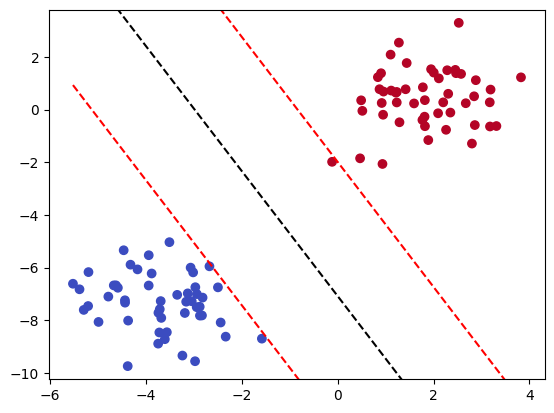

In [14]:
def plot_decision_boundary(X, y):
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]
    
    fig, ax = plt.subplots()
    
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, cmap='coolwarm')
    
    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])
    
    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)
    
    ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k--')
    
    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'r--')
    
    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'r--')
    
    ax.set_xlim([x0_1 - 0.5, x0_2 + 0.5])
    ax.set_ylim([np.amin(X[:, 1]) - 0.5, np.amax(X[:, 1]) + 0.5])
    
    plt.show()

# Plot decision boundary
plot_decision_boundary(X, y)